# 1.
Создайте переменную station_stat_multi, где для каждой АЗС будет 3 числа:
1) среднее (не медиана) продолжительности заезда на АЗС;
2) средняя доля быстрых заездов;
3) средняя доля медленных заездов.
Распечатайте матрицу корреляции между этими величинами. Постройте диаграмму рассеяния попарно для всех величин методом scatter_matrix(). Задайте размер 9х9 дюймов.

Подсказка
Методом pivot_table() объедините данные по каждой АЗС (id) и посчитайте среднее по столбцам time_spent, too_fast и too_slow: передайте их параметру values списком в квадратных скобках. Результат сохраните в переменной station_stat_multi.
Распечатайте матрицу корреляции, применив метод corr().
Постройте попарные диаграммы рассеяния методом pd.plotting.scatter_matrix, задайте размер в параметре figsize.

            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

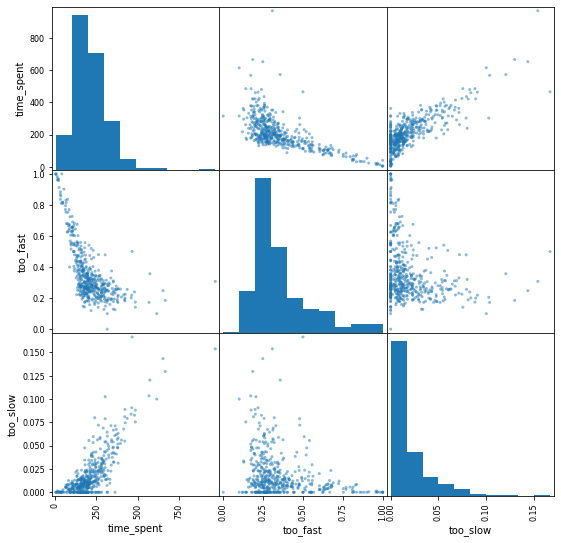

In [2]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)

station_stat_multi = data.pivot_table(index='id',
                                      values=['time_spent', 'too_fast', 'too_slow'],
                                      aggfunc='mean')
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))